In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
import tensorflow_datasets as tfds

# Load the CIFAR-10 dataset
dataset, info = tfds.load("cifar10", split="train", as_supervised=True, with_info=True)

# Split the training set into validation and training sets
validation_percentage = 10  # Percentage of data to use for validation
num_validation_samples = int(len(dataset) * (validation_percentage / 100.0))

train_set = dataset.skip(num_validation_samples)
valid_set = dataset.take(num_validation_samples)

# Load the test set
test_set = tfds.load("cifar10", split="test", as_supervised=True)

# Print the number of samples in each set
print("Train Set Size:", len(train_set))
print("Validation Set Size:", len(valid_set))
print("Test Set Size:", len(test_set))

# Extract the labels from the dataset
train_labels = [label for _, label in train_set]
valid_labels = [label for _, label in valid_set]
test_labels = [label for _, label in test_set]

# Print the number of labels in each set
print("Train Labels Size:", len(train_labels))
print("Validation Labels Size:", len(valid_labels))
print("Test Labels Size:", len(test_labels))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteQNPW9H/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteQNPW9H/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Train Set Size: 45000
Validation Set Size: 5000
Test Set Size: 10000
Train Labels Size: 45000
Validation Labels Size: 5000
Test Labels Size: 10000


In [3]:
train_images = [image for image,_ in train_set]
valid_images = [image for image,_ in valid_set]
test_images = [image for image,_ in test_set]

In [4]:
print("Train Images Size:", len(train_images))
print("Validation Images Size:", len(valid_images))
print("Test Images Size:", len(test_images))

Train Images Size: 45000
Validation Images Size: 5000
Test Images Size: 10000


In [5]:
import numpy as np
train_images=np.array(train_images
                       )
valid_images=np.array(valid_images
                       )
test_images=np.array(test_images
                       )

In [6]:
train_images,valid_images,test_images=train_images.astype('float32')/255.0,valid_images.astype('float32')/255.0,test_images.astype('float32')/255.0

In [7]:
train_labels=np.array(train_labels
                       )
valid_labels=np.array(valid_labels
                       )
test_labels=np.array(test_labels
                       )

In [8]:
train_b1,train_b2,train_b3,train_b4,train_b5=train_images[0:9000],train_images[9000:18000],train_images[18000:27000],train_images[27000:36000],train_images[36000:]
print(train_b1.shape)
print(train_b2.shape)
print(train_b3.shape)
print(train_b4.shape)
print(train_b5.shape)


(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)


In [9]:
train_l1,train_l2,train_l3,train_l4,train_l5=train_labels[0:9000],train_labels[9000:18000],train_labels[18000:27000],train_labels[27000:36000],train_labels[36000:]
print(train_l1.shape)
print(train_l2.shape)
print(train_l3.shape)
print(train_l4.shape)
print(train_l5.shape)

(9000,)
(9000,)
(9000,)
(9000,)
(9000,)


In [10]:
classes1,classes2,classes3,classes4,classes5 = train_l1,train_l2,train_l3,train_l4,train_l5
numberofclasses = 10
onehotencb1 = tf.one_hot(classes1,numberofclasses)
onehotencb2 = tf.one_hot(classes2,numberofclasses)
onehotencb3 = tf.one_hot(classes3,numberofclasses)
onehotencb4 = tf.one_hot(classes4,numberofclasses)
onehotencb5 = tf.one_hot(classes5,numberofclasses)


# Exploratory Data Analysis
## Data Summary

In [11]:
labellist={0:"Airplane",1:"Automobile",2:"Bird",3:"Cat",4:"Deer",5:"Dog",6:"Frog",7:"Horse",8:"Ship",9:"Truck"}
def summary(labelarray,imagearray):
  c0=len(np.where(labelarray==0)[0])
  c1=len(np.where(labelarray==1)[0])
  c2=len(np.where(labelarray==2)[0])
  c3=len(np.where(labelarray==3)[0])
  c4=len(np.where(labelarray==4)[0])
  c5=len(np.where(labelarray==5)[0])
  c6=len(np.where(labelarray==6)[0])
  c7=len(np.where(labelarray==7)[0])
  c8=len(np.where(labelarray==8)[0])
  c9=len(np.where(labelarray==9)[0])
  print(f"Label Counts of [0]Airplane: {c0}")
  print(f"Label Counts of [1]Automobile: {c1}")
  print(f"Label Counts of [2]Bird: {c2}")
  print(f"Label Counts of [3]Cat: {c3}")
  print(f"Label Counts of [4]Deer: {c4}")
  print(f"Label Counts of [5]Dog: {c5}")
  print(f"Label Counts of [6]Frog: {c6}")
  print(f"Label Counts of [7]Horse: {c7}")
  print(f"Label Counts of [8]Ship: {c8}")
  print(f"Label Counts of [9]Truck: {c9}")
  print("")
  imageind=np.random.randint(0,len(labelarray))
  print(f"Stats of image at index [{imageind}]:")

  image=(imagearray)[imageind]
  print(f"Image shape: {image.shape}")
  print(f"Image- Min Value:{np.min(image)*255.0}, Max Value:{np.max(image)*255.0}")
  print(f"Label- Label Id:{labelarray[imageind]}, Label Name:{labellist[labelarray[imageind]]} ")
  plt.imshow(image,interpolation="lanczos")
  plt.show()



Stats of batch 1:
Label Counts of [0]Airplane: 931
Label Counts of [1]Automobile: 941
Label Counts of [2]Bird: 889
Label Counts of [3]Cat: 856
Label Counts of [4]Deer: 913
Label Counts of [5]Dog: 869
Label Counts of [6]Frog: 906
Label Counts of [7]Horse: 951
Label Counts of [8]Ship: 878
Label Counts of [9]Truck: 866

Stats of image at index [3454]:
Image shape: (32, 32, 3)
Image- Min Value:0.0, Max Value:190.0000038743019
Label- Label Id:3, Label Name:Cat 


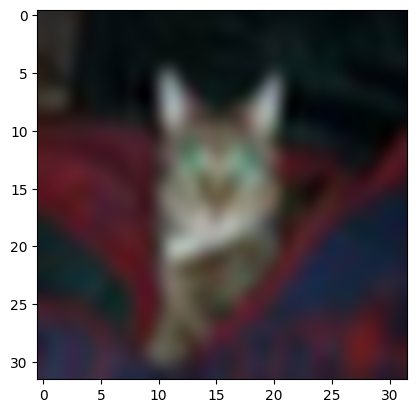

Stats of batch 2:
Label Counts of [0]Airplane: 933
Label Counts of [1]Automobile: 866
Label Counts of [2]Bird: 899
Label Counts of [3]Cat: 929
Label Counts of [4]Deer: 929
Label Counts of [5]Dog: 925
Label Counts of [6]Frog: 887
Label Counts of [7]Horse: 853
Label Counts of [8]Ship: 880
Label Counts of [9]Truck: 899

Stats of image at index [5550]:
Image shape: (32, 32, 3)
Image- Min Value:0.0, Max Value:242.00000077486038
Label- Label Id:7, Label Name:Horse 


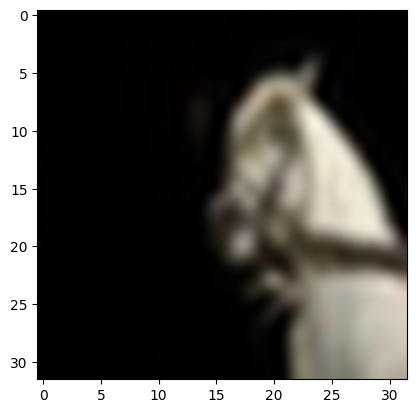

Stats of batch 3:
Label Counts of [0]Airplane: 894
Label Counts of [1]Automobile: 932
Label Counts of [2]Bird: 953
Label Counts of [3]Cat: 900
Label Counts of [4]Deer: 880
Label Counts of [5]Dog: 887
Label Counts of [6]Frog: 894
Label Counts of [7]Horse: 934
Label Counts of [8]Ship: 875
Label Counts of [9]Truck: 851

Stats of image at index [8247]:
Image shape: (32, 32, 3)
Image- Min Value:16.000000946223736, Max Value:240.00000089406967
Label- Label Id:3, Label Name:Cat 


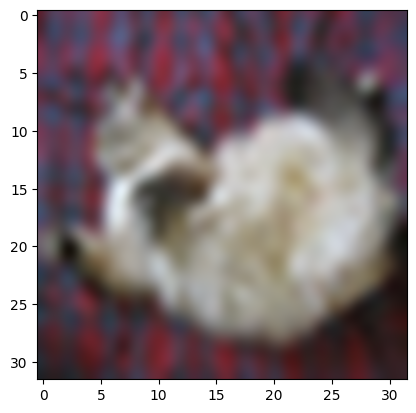

Stats of batch 4:
Label Counts of [0]Airplane: 893
Label Counts of [1]Automobile: 904
Label Counts of [2]Bird: 871
Label Counts of [3]Cat: 910
Label Counts of [4]Deer: 894
Label Counts of [5]Dog: 908
Label Counts of [6]Frog: 926
Label Counts of [7]Horse: 905
Label Counts of [8]Ship: 908
Label Counts of [9]Truck: 881

Stats of image at index [4791]:
Image shape: (32, 32, 3)
Image- Min Value:16.000000946223736, Max Value:255.0
Label- Label Id:0, Label Name:Airplane 


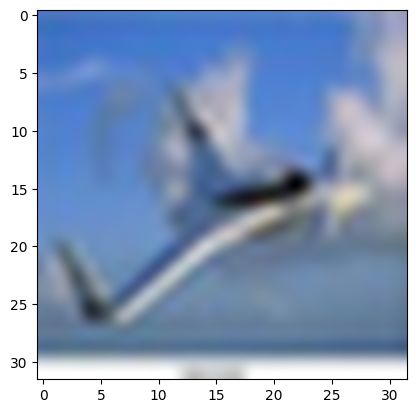

Stats of batch 5:
Label Counts of [0]Airplane: 834
Label Counts of [1]Automobile: 881
Label Counts of [2]Bird: 888
Label Counts of [3]Cat: 908
Label Counts of [4]Deer: 898
Label Counts of [5]Dog: 893
Label Counts of [6]Frog: 897
Label Counts of [7]Horse: 886
Label Counts of [8]Ship: 940
Label Counts of [9]Truck: 975

Stats of image at index [8861]:
Image shape: (32, 32, 3)
Image- Min Value:38.0000015348196, Max Value:153.00000607967377
Label- Label Id:4, Label Name:Deer 


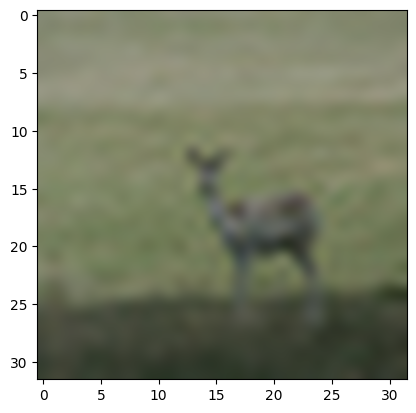

In [12]:
for i in range(1,6):
  print(f"Stats of batch {i}:")
  if(i==1):
    summary(train_l1,train_b1)
  elif(i==2):
    summary(train_l2,train_b2)
  elif(i==3):
    summary(train_l3,train_b3)
  elif(i==4):
    summary(train_l4,train_b4)
  elif(i==5):
    summary(train_l5,train_b5)

Stats of validation dataset:
Label Counts of [0]Airplane: 515
Label Counts of [1]Automobile: 476
Label Counts of [2]Bird: 500
Label Counts of [3]Cat: 497
Label Counts of [4]Deer: 486
Label Counts of [5]Dog: 518
Label Counts of [6]Frog: 490
Label Counts of [7]Horse: 471
Label Counts of [8]Ship: 519
Label Counts of [9]Truck: 528

Stats of image at index [1359]:
Image shape: (32, 32, 3)
Image- Min Value:43.00000123679638, Max Value:252.00000017881393
Label- Label Id:5, Label Name:Dog 


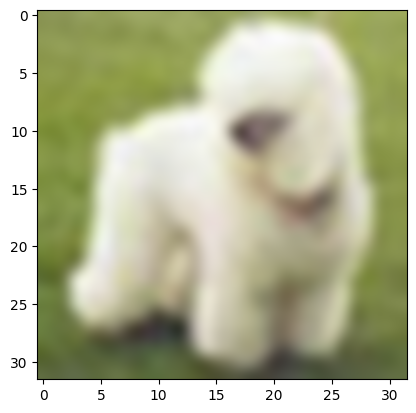

In [13]:
print("Stats of validation dataset:")
summary(valid_labels,valid_images)


## Bar plots
### To represent Class Distribution- will help to find out whether there are class imbalance issues and how frequencies of different classes are distributed relative to each other (whether all classes have more or less same number of images or the data has more images in few classes and less in others, i.e biased)


In [14]:
import pandas as pd
def barchartmaking(labelarray):
  data={"bins":[0,1,2,3,4,5,6,7,8,9],"frequency":[np.count_nonzero(labelarray==0),np.count_nonzero(labelarray==1),np.count_nonzero(labelarray==2),np.count_nonzero(labelarray==3),np.count_nonzero(labelarray==4),np.count_nonzero(labelarray==5),np.count_nonzero(labelarray==6),np.count_nonzero(labelarray==7),np.count_nonzero(labelarray==8),np.count_nonzero(labelarray==9)]}
  df=pd.DataFrame(data)
  colors = ['green','blue','purple','brown','teal','orange','red','gray','pink','indigo']
  plt.figure(figsize=(6, 4))
  plt.bar(df['bins'], df['frequency'], color=colors)
  plt.xticks(df['bins'])
  plt.title('Distribution of Images across Classes', fontsize=10)
  plt.xlabel('Classes/Categories', fontsize=8)
  plt.ylabel('Number of Images', fontsize=8)
  plt.grid(False)
  plt.show()






Barplot of batch 1


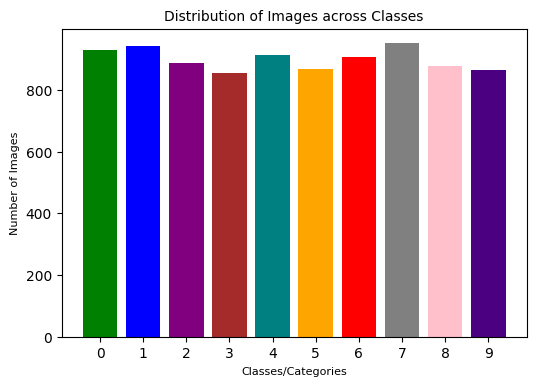

Barplot of batch 2


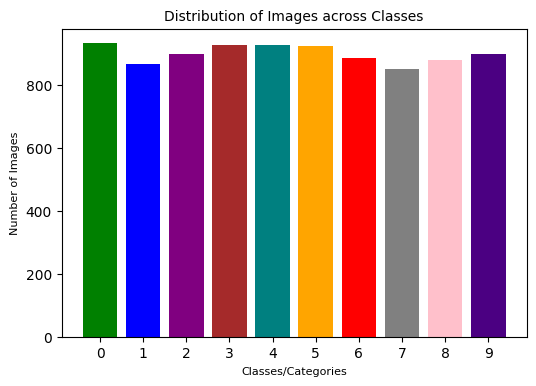

Barplot of batch 3


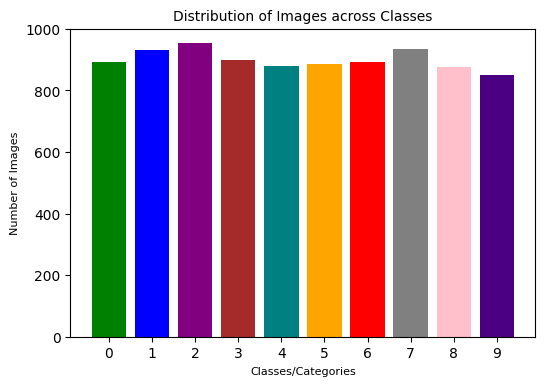

Barplot of batch 4


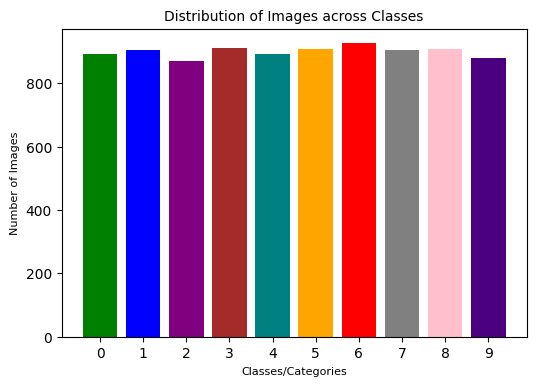

Barplot of batch 5


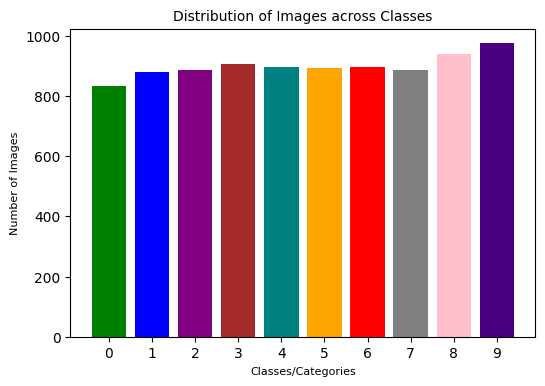

In [15]:
print("Barplot of batch 1")
barchartmaking(train_l1)
print("Barplot of batch 2")
barchartmaking(train_l2)
print("Barplot of batch 3")
barchartmaking(train_l3)
print("Barplot of batch 4")
barchartmaking(train_l4)
print("Barplot of batch 5")
barchartmaking(train_l5)

Barplot of validation set


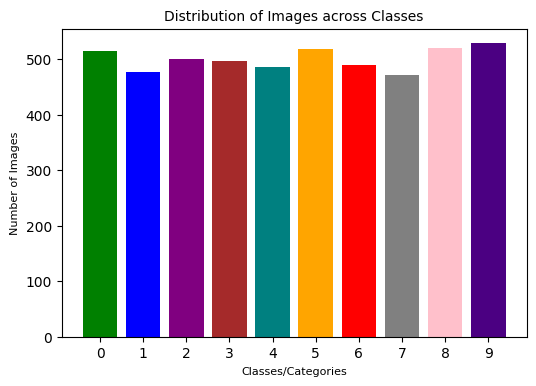

In [16]:
print("Barplot of validation set")
barchartmaking(valid_labels)

## Distribution of Colors (for each Class)

In [17]:

uniqueind=[]
uniqueimages=[]
for i in train_labels:
  if i not in uniqueind:
    uniqueind.append(i)
    uniqueimages.append(np.where(train_labels==i)[0][0])
def histmaker():
  plt.figure(figsize=(15,50))
  n=0
  for i in uniqueimages:
    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[:1024])
    plt.title("red: " + labellist[train_labels[i]])
    n += 1

    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[1024:2048])
    plt.title("green: " + labellist[train_labels[i]])
    n += 1

    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[2048:])
    plt.title("blue: " + labellist[train_labels[i]])
    n += 1
  plt.show()


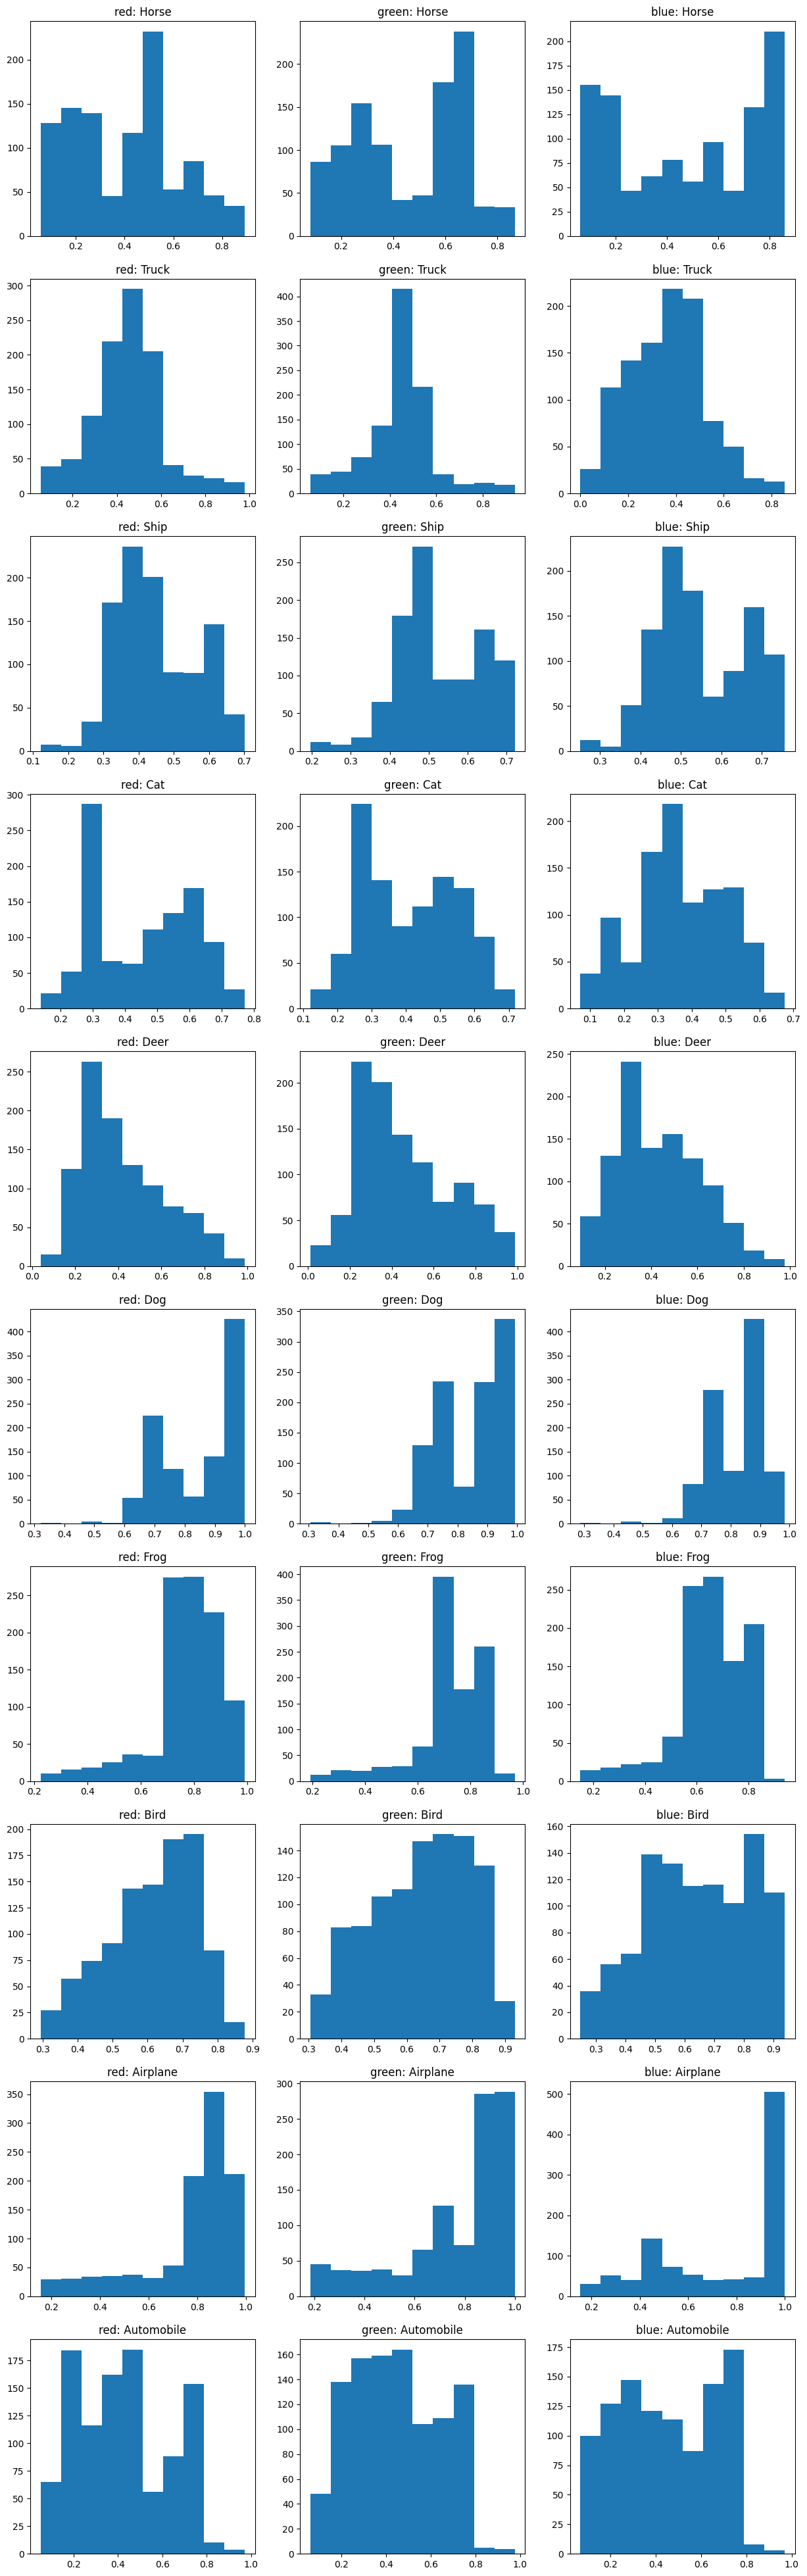

In [18]:
histmaker()

In [52]:
from keras.engine.sequential import Sequential
final_labels_encoded=np.concatenate((onehotencb1,onehotencb2,onehotencb3,onehotencb4,onehotencb5))
valid_lfinal=tf.one_hot(valid_labels,numberofclasses)
test_labels_f=tf.one_hot(test_labels,numberofclasses)
model1=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='softmax')
])
from tensorflow.keras import optimizers
optim=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model1.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
trainer= model1.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, result = model1.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/10
704/704 [==============================] - 97s 138ms/step - loss: 1.7510 - accuracy: 0.3792 - val_loss: 1.5065 - val_accuracy: 0.4742
Epoch 2/10
704/704 [==============================] - 96s 137ms/step - loss: 1.4115 - accuracy: 0.4998 - val_loss: 1.3810 - val_accuracy: 0.5052
Epoch 3/10
704/704 [==============================] - 96s 137ms/step - loss: 1.2598 - accuracy: 0.5539 - val_loss: 1.2454 - val_accuracy: 0.5642
Epoch 4/10
704/704 [==============================] - 96s 136ms/step - loss: 1.1536 - accuracy: 0.5965 - val_loss: 1.1682 - val_accuracy: 0.5904
Epoch 5/10
704/704 [==============================] - 99s 141ms/step - loss: 1.0716 - accuracy: 0.6254 - val_loss: 1.1039 - val_accuracy: 0.6086
Epoch 6/10
704/704 [==============================] - 97s 137ms/step - loss: 1.0054 - accuracy: 0.6477 - val_loss: 1.0520 - val_accuracy: 0.6326
Epoch 7/10
704/704 [==============================] - 97s 138ms/step - loss: 0.9442 - accuracy: 0.6722 - val_loss: 1.0206 - val_ac

In [54]:
def plotter(trainerid,resultid):
  fig,ax=plt.subplots(1,2,figsize=(12,4))
  ax[0].set_title('Cross Entropy Loss')
  ax[0].plot(trainerid.history['loss'], color='blue', label='train')
  ax[0].plot(trainerid.history['val_loss'], color='orange', label='validation')
  ax[1].set_title('Classification Accuracy')
  ax[1].plot(trainerid.history['accuracy'], color='blue', label='train')
  ax[1].plot(trainerid.history['val_accuracy'], color='orange', label='validation')
  plt.show()
  print("Final model performance- accuracy on test dataset")
  print('> %.3f' % (resultid * 100.0))

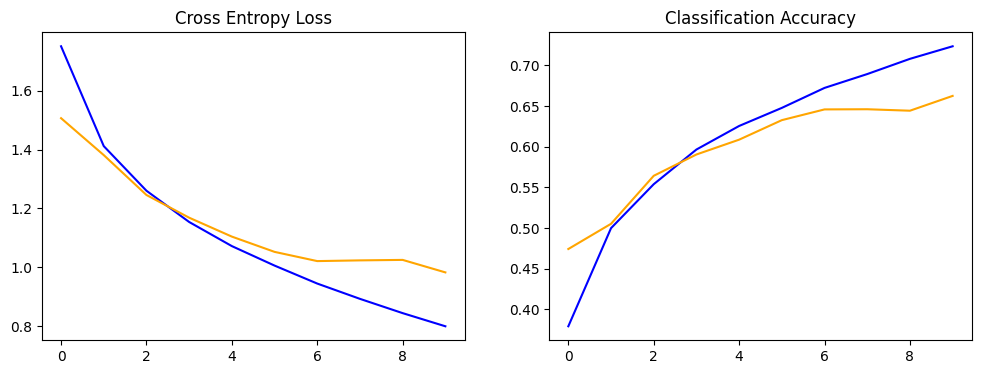

Final model performance- accuracy on test dataset
> 65.760


In [55]:
plotter(trainer,result)

In [57]:
model2=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='softmax')
])
optim2=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model2.compile(optimizer=optim2, loss='categorical_crossentropy', metrics=['accuracy'])
trainer2= model2.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, result2 = model2.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/10
704/704 [==============================] - 175s 247ms/step - loss: 1.7805 - accuracy: 0.3582 - val_loss: 1.5857 - val_accuracy: 0.4370
Epoch 2/10
704/704 [==============================] - 174s 246ms/step - loss: 1.4161 - accuracy: 0.4938 - val_loss: 1.3431 - val_accuracy: 0.5252
Epoch 3/10
704/704 [==============================] - 173s 245ms/step - loss: 1.2501 - accuracy: 0.5576 - val_loss: 1.2189 - val_accuracy: 0.5722
Epoch 4/10
704/704 [==============================] - 174s 247ms/step - loss: 1.1312 - accuracy: 0.6047 - val_loss: 1.1226 - val_accuracy: 0.6044
Epoch 5/10
704/704 [==============================] - 173s 246ms/step - loss: 1.0388 - accuracy: 0.6366 - val_loss: 1.0892 - val_accuracy: 0.6176
Epoch 6/10
704/704 [==============================] - 173s 245ms/step - loss: 0.9677 - accuracy: 0.6633 - val_loss: 1.1061 - val_accuracy: 0.6216
Epoch 7/10
704/704 [==============================] - 173s 246ms/step - loss: 0.8973 - accuracy: 0.6894 - val_loss: 0.9855 -

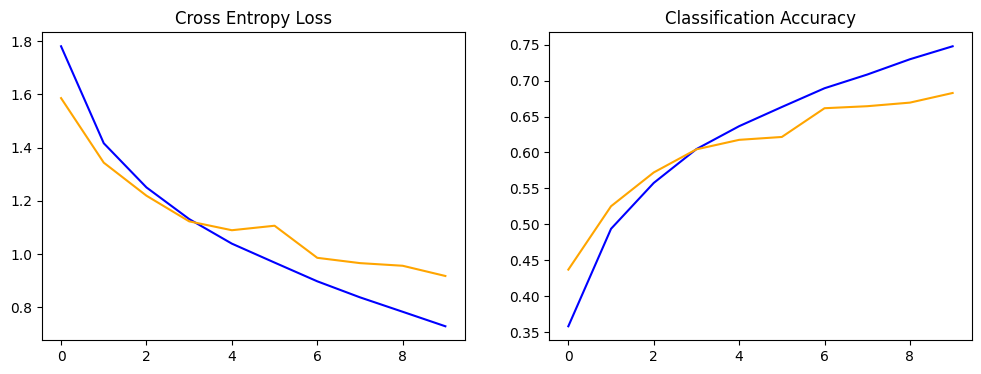

Final model performance- accuracy on test dataset
> 67.730


In [58]:
plotter(trainer2,result2)

In [59]:
model3=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='softmax')
])
optim3=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model3.compile(optimizer=optim3, loss='categorical_crossentropy', metrics=['accuracy'])
trainer3= model3.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, result3 = model3.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/10
704/704 [==============================] - 255s 361ms/step - loss: 1.7914 - accuracy: 0.3544 - val_loss: 1.5523 - val_accuracy: 0.4540
Epoch 2/10
704/704 [==============================] - 252s 358ms/step - loss: 1.4568 - accuracy: 0.4786 - val_loss: 1.3526 - val_accuracy: 0.5264
Epoch 3/10
704/704 [==============================] - 246s 350ms/step - loss: 1.3023 - accuracy: 0.5368 - val_loss: 1.2415 - val_accuracy: 0.5654
Epoch 4/10
704/704 [==============================] - 251s 357ms/step - loss: 1.1768 - accuracy: 0.5838 - val_loss: 1.2460 - val_accuracy: 0.5562
Epoch 5/10
704/704 [==============================] - 249s 354ms/step - loss: 1.0736 - accuracy: 0.6230 - val_loss: 1.0743 - val_accuracy: 0.6298
Epoch 6/10
704/704 [==============================] - 246s 349ms/step - loss: 0.9797 - accuracy: 0.6564 - val_loss: 1.0361 - val_accuracy: 0.6452
Epoch 7/10
704/704 [==============================] - 251s 356ms/step - loss: 0.9068 - accuracy: 0.6834 - val_loss: 0.9966 -

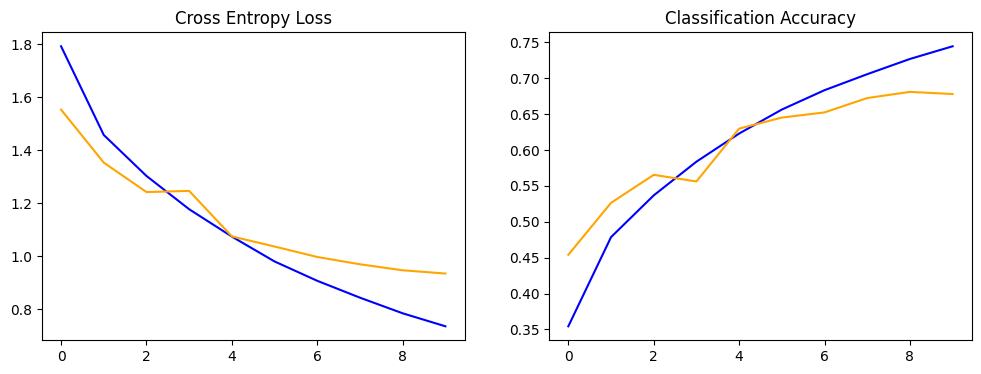

Final model performance- accuracy on test dataset
> 67.360


In [60]:
plotter(trainer3,result3)